In [49]:
from keras import backend as K
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read data
train = pd.read_csv('data/train.csv')
# shuffle
train = train.sample(frac=1)

In [5]:
labels = train.iloc[:,0].values.astype('int32')
x_train = (train.iloc[:,1:].values).astype('float32')
x_test = (pd.read_csv('data/test.csv').values).astype('float32')

In [6]:
# expect same output as input
y_train = x_train

In [7]:
scale = np.max(x_train)
x_train /= scale
x_test /= scale

mean = np.std(x_train)
x_train -= mean
x_test -= mean

In [8]:
input_dim = x_train.shape[1]
nb_classes = y_train.shape[1]

In [39]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(input_dim))
model.add(Activation('tanh'))

In [40]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [41]:
history = model.fit(x_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
 - 18s - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 2/20
 - 18s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 3/20
 - 15s - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 4/20
 - 15s - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 5/20
 - 14s - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 6/20
 - 14s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 7/20
 - 23s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 8/20
 - 18s - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 9/20
 - 14s - loss: 0.0116 - mean

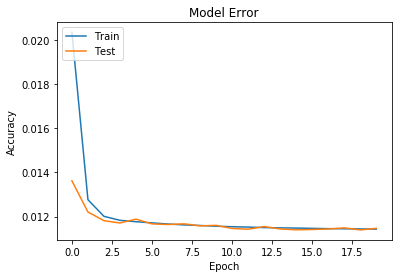

In [42]:
# Plot training & validation accuracy values
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Error')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

# Testing
layer_outs = functor([x_train[0:20], 1.])
layer_outs[3].shape

(20, 64)

In [63]:
model.layers[4].get_weights()[0].shape

(64, 784)

In [64]:
model.layers[4].get_weights()[1].shape

(784,)

In [68]:
np.save('data/compressed_images', layer_outs[3])
np.save('data/decoder_weights', model.layers[4].get_weights()[0])
np.save('data/decoder_biases', model.layers[4].get_weights()[1])